An example calculating and comparing zonal heating rates in the tropics from Cloudsat FLXHR-LIDAR files

In [1]:
import pathlib
from datetime import datetime

import numpy as np
import xarray as xr
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt

from cloudsatipy import open_cloudsat

In [2]:
data_path = pathlib.Path("../../data/cloudsat/2b_flxhr_lidar")

In [3]:
date = datetime(2010, 8, 1)

In [4]:
flxhr_files = sorted(list((data_path / date.strftime("%Y") / date.strftime("%j")).glob("*.hdf")))

In [5]:
flxhr_files

[PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213011738_22655_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213025631_22656_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213043524_22657_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213061417_22658_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213075310_22659_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213093203_22660_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213111057_22661_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213124950_22662_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPa

In [6]:
open_cloudsat(flxhr_files[0], variable="QR")

<xarray.Dataset> Size: 57MB
Dimensions:             (Nray: 37081, Nbin: 125, Nbands_Flxhr2B: 2,
                         Nz_Hr_Flxhr2B: 125)
Coordinates:
    Profile_time        (Nray) datetime64[ns] 297kB 2010-08-01T01:17:38.66796...
    UTC_start           float64 8B 4.659e+03
    TAI_start           float64 8B 5.548e+08
    Latitude            (Nray) float32 148kB -0.003431 -0.0131 ... 0.007986
    Longitude           (Nray) float32 148kB 6.837 6.835 6.833 ... -17.88 -17.88
    Height              (Nray, Nbin) float32 19MB 2.503e+04 ... -4.79e+03
    Range_to_intercept  (Nray) float32 148kB 705.7 705.7 705.7 ... 705.6 705.6
    DEM_elevation       (Nray) float32 148kB nan nan nan nan ... nan nan nan nan
    Vertical_binsize    float64 8B 239.8
    Pitch_offset        float64 8B 0.16
    Roll_offset         float64 8B 0.0
    SurfaceHeightBin    (Nray) float32 148kB 105.0 105.0 105.0 ... 105.0 105.0
Dimensions without coordinates: Nray, Nbin, Nbands_Flxhr2B, Nz_Hr_Flxhr2B
Data variables:
    QR                  (Nbands_Flxhr2B, Nray, Nz_Hr_Flxhr2B) float32 37MB na...
Attributes:
    granule_number:     22655.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Thu Jan 05 20:48:24 2023
    algorithm_name:     2B-FLXHR-LIDAR
    algorithm_version:  P2_R05.2
    product_version:    P2_R05
    start_time:         20100801011738
    end_time:           20100801025631

Load and concatenate QR field

In [7]:
cloudsat_qr = xr.concat((open_cloudsat(f, variable="QR") for f in flxhr_files), "Nray")

In [8]:
cloudsat_qr

<xarray.Dataset> Size: 802MB
Dimensions:             (Nbands_Flxhr2B: 2, Nray: 519140, Nz_Hr_Flxhr2B: 125,
                         Nbin: 125)
Coordinates:
    Profile_time        (Nray) datetime64[ns] 4MB 2010-08-01T01:17:38.6679687...
    UTC_start           (Nray) float64 4MB 4.659e+03 4.659e+03 ... 8.179e+04
    TAI_start           (Nray) float64 4MB 5.548e+08 5.548e+08 ... 5.549e+08
    Latitude            (Nray) float32 2MB -0.003431 -0.0131 ... 0.009378
    Longitude           (Nray) float32 2MB 6.837 6.835 6.833 ... 20.75 20.74
    Height              (Nray, Nbin) float32 260MB 2.503e+04 ... -4.683e+03
    Range_to_intercept  (Nray) float32 2MB 705.7 705.7 705.7 ... 705.7 705.7
    DEM_elevation       (Nray) float32 2MB nan nan nan nan ... 379.0 374.0 370.0
    Vertical_binsize    float64 8B 239.8
    Pitch_offset        float64 8B 0.16
    Roll_offset         float64 8B 0.0
    SurfaceHeightBin    (Nray) float32 2MB 105.0 105.0 105.0 ... 104.0 104.0
Dimensions without coordinates: Nbands_Flxhr2B, Nray, Nz_Hr_Flxhr2B, Nbin
Data variables:
    QR                  (Nbands_Flxhr2B, Nray, Nz_Hr_Flxhr2B) float32 519MB n...
Attributes:
    granule_number:     22655.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Thu Jan 05 20:48:24 2023
    algorithm_name:     2B-FLXHR-LIDAR
    algorithm_version:  P2_R05.2
    product_version:    P2_R05
    start_time:         20100801011738
    end_time:           20100801025631

In [9]:
cloudsat_qr.Nbin.size

125

In [10]:
lat_bins = np.arange(-30, 31, 1)
height_bins = np.arange(0,2.5e4+1,500)

In [11]:
# Tile lats to same shape as height and QR
lats = np.tile(cloudsat_qr.Latitude.values.reshape([-1,1]), (1, cloudsat_qr.Nbin.size))
heights = cloudsat_qr.Height.values
# Sum SW and LW to get total heating rate
qr = cloudsat_qr.QR.sum("Nbands_Flxhr2B").values

In [12]:
# Bin data by latitude and height and calculate mean
zonal_mean_qr = binned_statistic_2d(
    heights.ravel(),
    lats.ravel(),
    qr.ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

In [13]:
zonal_mean_qr

BinnedStatistic2dResult(statistic=array([[-3.38166445e-01, -1.76416710e-01, -2.43256345e-01, ...,
        -4.36205328e-01, -2.91150272e-01, -3.04737180e-01],
       [-7.02069819e-01, -2.03350291e-01, -1.91782057e-01, ...,
        -4.05037910e-01, -7.76876569e-01, -2.52832443e-01],
       [-1.20463502e+00, -1.32935715e+00, -1.29005921e+00, ...,
        -7.76402652e-01, -1.36717629e+00, -1.20805538e+00],
       ...,
       [ 8.62555355e-02,  8.46671015e-02,  9.71338898e-02, ...,
         1.16335630e-01,  8.42814818e-02,  5.77557683e-02],
       [ 4.78061177e-02,  3.71968560e-02,  4.96666692e-02, ...,
         1.17061056e-01,  8.32150951e-02,  5.95768876e-02],
       [-1.26237115e-02, -2.35638209e-02, -5.00653347e-04, ...,
         5.62491678e-02,  4.74202586e-03,  1.02635110e-02]]), x_edge=array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
        8000.,  8500.,  9000.,  9500., 10000., 10500., 1100

In [14]:
img_extent = [zonal_mean_qr.y_edge[0], zonal_mean_qr.y_edge[-1], zonal_mean_qr.x_edge[0], zonal_mean_qr.x_edge[-1]]

Text(0, 0.5, 'Height [m]')

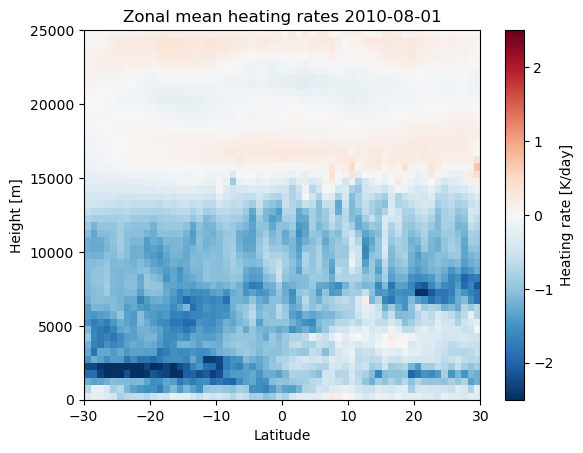

In [15]:
plt.imshow(zonal_mean_qr.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-2.5, vmax=2.5)
plt.colorbar(label="Heating rate [K/day]")
plt.title(f'Zonal mean heating rates {date.strftime("%Y-%m-%d")}')
plt.xlabel("Latitude")
plt.ylabel("Height [m]")

In [16]:
# Repeat for a different time of year
date = datetime(2010, 2, 1)
flxhr_files = sorted(list((data_path / date.strftime("%Y") / date.strftime("%j")).glob("*.hdf")))
cloudsat_qr_feb = xr.concat((open_cloudsat(f, variable="QR") for f in flxhr_files), "Nray")

lats = np.tile(cloudsat_qr_feb.Latitude.values.reshape([-1,1]), (1, cloudsat_qr.Nbin.size))
heights = cloudsat_qr_feb.Height.values
qr = cloudsat_qr_feb.QR.sum("Nbands_Flxhr2B").values

zonal_mean_qr_feb = binned_statistic_2d(
    heights.ravel(),
    lats.ravel(),
    qr.ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

Text(0, 0.5, 'Height [m]')

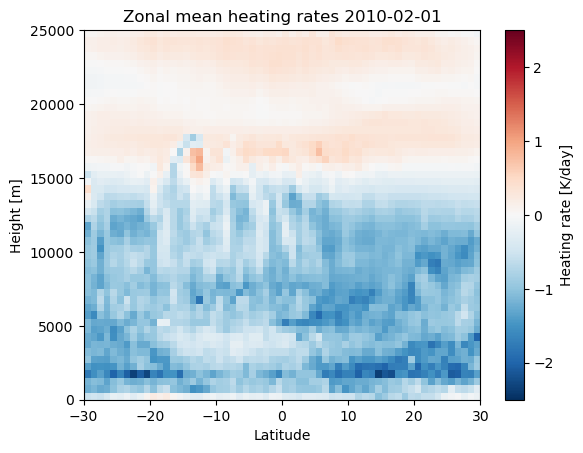

In [17]:
plt.imshow(zonal_mean_qr_feb.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-2.5, vmax=2.5)
plt.colorbar(label="Heating rate [K/day]")
plt.title(f'Zonal mean heating rates {date.strftime("%Y-%m-%d")}')
plt.xlabel("Latitude")
plt.ylabel("Height [m]")

Text(0, 0.5, 'Height [m]')

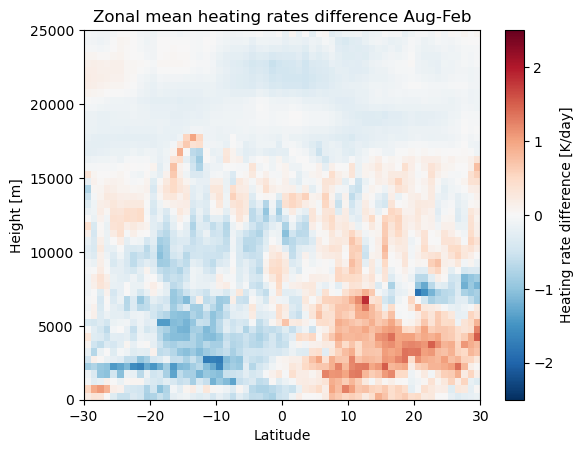

In [20]:
plt.imshow(zonal_mean_qr.statistic - zonal_mean_qr_feb.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-2.5, vmax=2.5)
plt.colorbar(label="Heating rate difference [K/day]")
plt.title(f'Zonal mean heating rates difference Aug-Feb')
plt.xlabel("Latitude")
plt.ylabel("Height [m]")